# Introduction to Forecasting

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv',index_col = 'Month', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


- The size of the test set is typically about 20% of the total sample, although this value depends on how long the sample is and how far ahead you want to forecast. The test set should ideally be at least as large as the maximum forecast horizon required.
- Keep in mind, the longer the forecast horizon, the more likely your prediction becomes less accurate

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
train_data = df.iloc[:109] #.loc[:'1940-01-01']
test_data = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',seasonal='mul',
                                   seasonal_periods=12).fit()

C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [10]:
test_predictions = fitted_model.forecast(36)

In [11]:
test_predictions

1958-02-01    339.142839
1958-03-01    399.281567
1958-04-01    394.233518
1958-05-01    402.545212
1958-06-01    473.128729
1958-07-01    521.795258
1958-08-01    514.513564
1958-09-01    446.216722
1958-10-01    385.430842
1958-11-01    339.645012
1958-12-01    381.455551
1959-01-01    401.210071
1959-02-01    387.159060
1959-03-01    455.812296
1959-04-01    450.049538
1959-05-01    459.538011
1959-06-01    540.114821
1959-07-01    595.671611
1959-08-01    587.358966
1959-09-01    509.392582
1959-10-01    440.000570
1959-11-01    387.732331
1959-12-01    435.462452
1960-01-01    458.013840
1960-02-01    441.973470
1960-03-01    520.346708
1960-04-01    513.768052
1960-05-01    524.599914
1960-06-01    616.584878
1960-07-01    680.007460
1960-08-01    670.517902
1960-09-01    581.512951
1960-10-01    502.296340
1960-11-01    442.627906
1960-12-01    497.115710
1961-01-01    522.859949
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

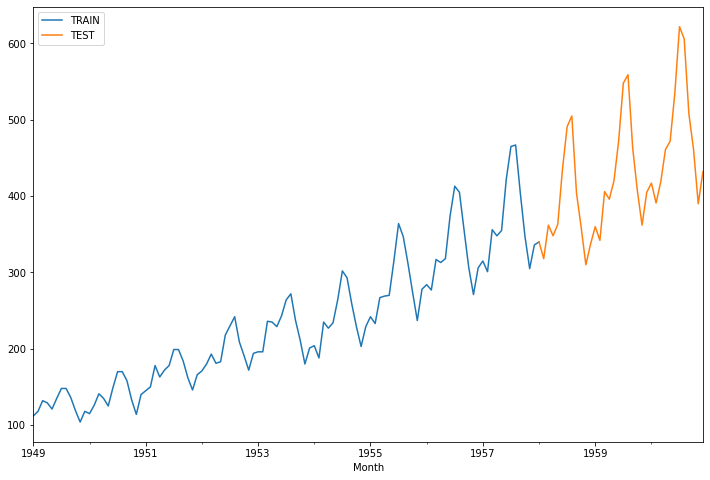

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

<AxesSubplot:xlabel='Month'>

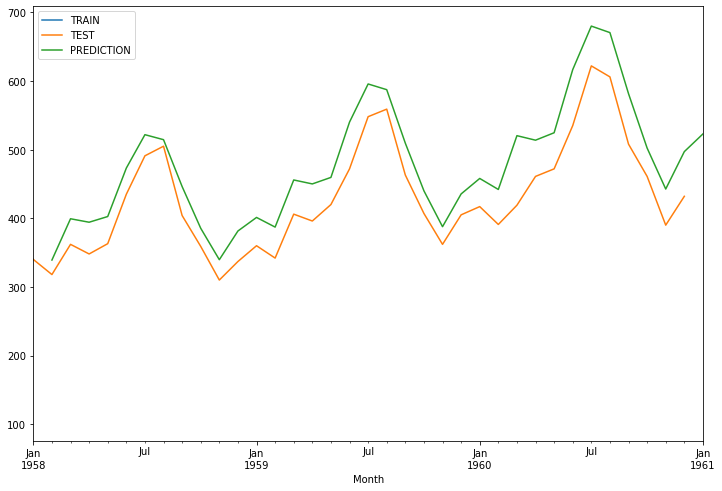

In [13]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [15]:
mean_absolute_error(test_data, test_predictions)

63.031111382769595

In [16]:
mean_squared_error(test_data, test_predictions)

5614.2515044341835

In [18]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92830909899264

In [19]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend ='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [20]:
forecast_prediction = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

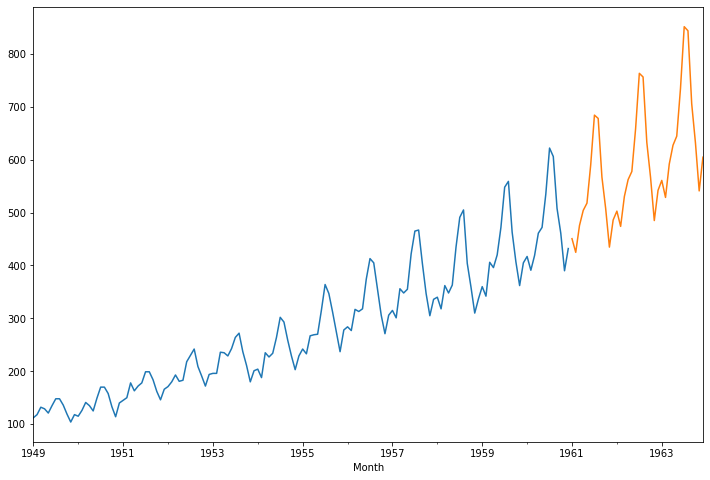

In [23]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_prediction.plot()

In [24]:
df2 = pd.read_csv('Data/samples.csv', index_col = 0, parse_dates=True)

In [25]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot:>

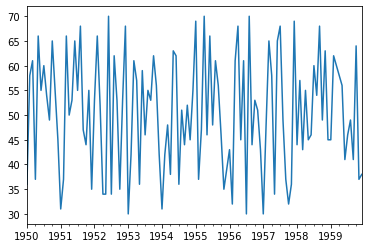

In [26]:
df2['a'].plot()

<AxesSubplot:>

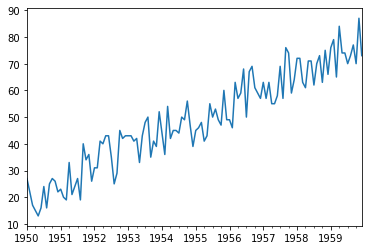

In [27]:
df2['b'].plot()

In [30]:
from statsmodels.tsa.statespace.tools import diff

<AxesSubplot:>

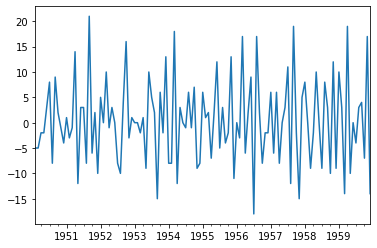

In [34]:
# df2['b'] - df2['b'].shift(1)
diff(df2['b'], k_diff=1).plot()

# ACF & PACF

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline

import statsmodels.api as sm

In [37]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [38]:
# NON STATIONARY
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [40]:
# STATIONARY
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [41]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [42]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.DataFrame({'a' : [13, 5, 11, 12, 9]})

In [46]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [48]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [52]:
pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [54]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [55]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

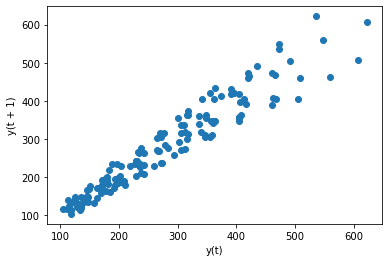

In [56]:
lag_plot(df1['Thousands of Passengers'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

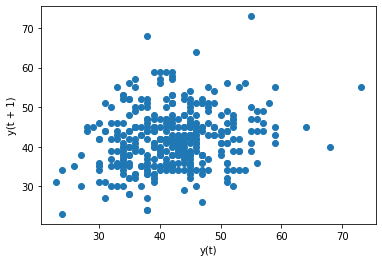

In [59]:
lag_plot(df2['Births'])

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

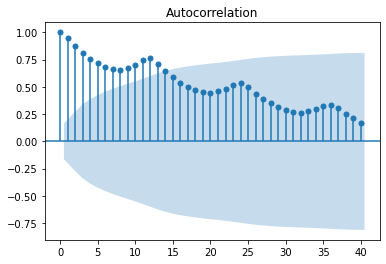

In [68]:
plot_acf(df1,lags=40);

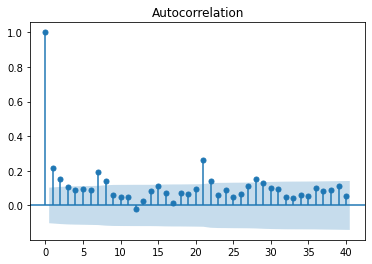

In [70]:
plot_acf(df2, lags=40);

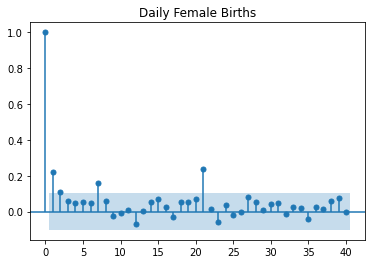

In [72]:
plot_pacf(df2, lags=40, title='Daily Female Births');

# ARIMA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR, ARResults

In [2]:
df = pd.read_csv('Data/uspopulation.csv', index_col='DATE', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

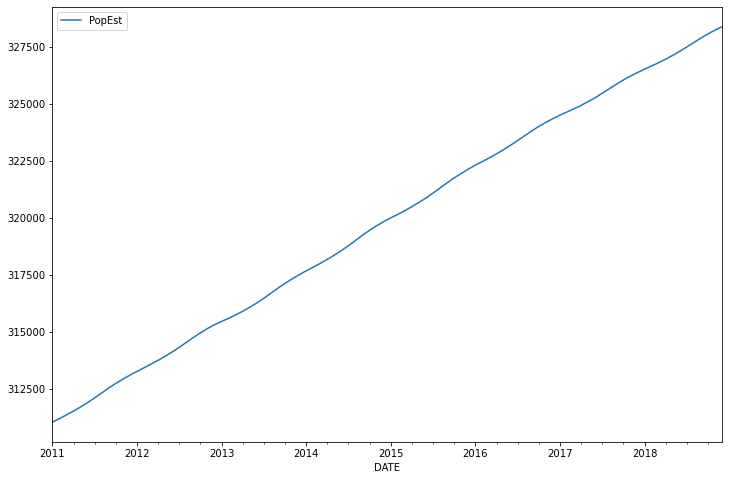

In [6]:
df.plot(figsize = (12, 8))

In [7]:
len(df)

96

In [8]:
96-12

84

In [9]:
train = df.iloc[:84]
test = df.iloc[84:]

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
model = AR(train['PopEst'])

In [44]:
AR1fit = model.fit(maxlag=1)

In [45]:
AR1fit.k_ar

1

In [46]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [47]:
start = len(train)
end = len(train) + len(test) - 1

In [48]:
print(start, end)

84 95


In [49]:
AR1fit.predict(start, end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [50]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [51]:
predictions1 = AR1fit.predict(start, end)

In [52]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [53]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

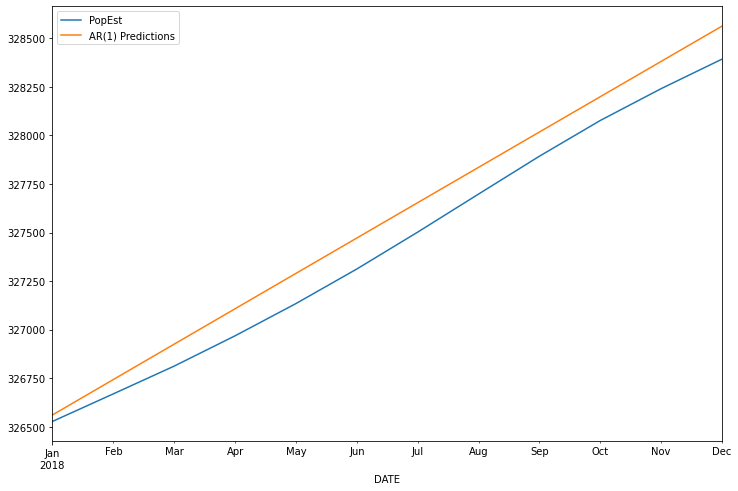

In [54]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)

In [56]:
model = AR(train['PopEst'])

In [57]:
AR2fit = model.fit(maxlag = 2)

In [58]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [59]:
predictions2 = AR2fit.predict(start, end)

In [60]:
predictions2 = predictions2.rename('AR (2) Predictions')

<AxesSubplot:xlabel='DATE'>

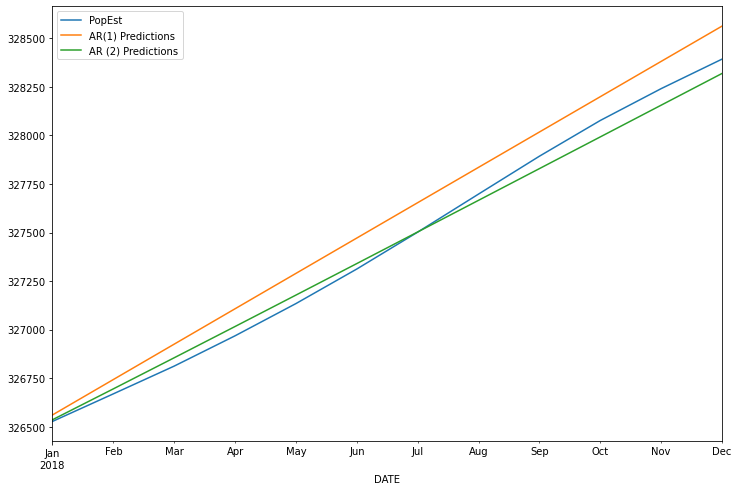

In [61]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

In [63]:
model = AR(train['PopEst'])

In [64]:
ARfit = model.fit(ic='t-stat')

In [65]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [68]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR (8) Predictions')

In [66]:
from sklearn.metrics import mean_squared_error

In [69]:
labels = ['AR1', 'AR2', 'AR8']

In [70]:
preds = [predictions1, predictions2, predictions8]

In [71]:
for i in range(3):
    # np.sqrt()
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714239577344
AR2 MSE was : 2713.258615675103
AR8 MSE was : 186.97377437908688


<AxesSubplot:xlabel='DATE'>

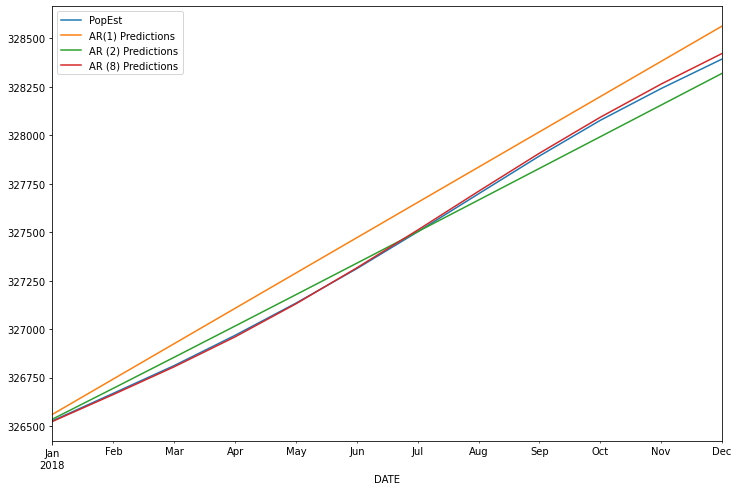

In [73]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions8.plot(legend = True)

In [74]:
# Forecasting __ Future

model = AR(df['PopEst'])

ARfit = model.fit()

forcasted_values = ARfit.predict(start = len(df), end = len(df) + 12).rename('Forecast')

<AxesSubplot:xlabel='DATE'>

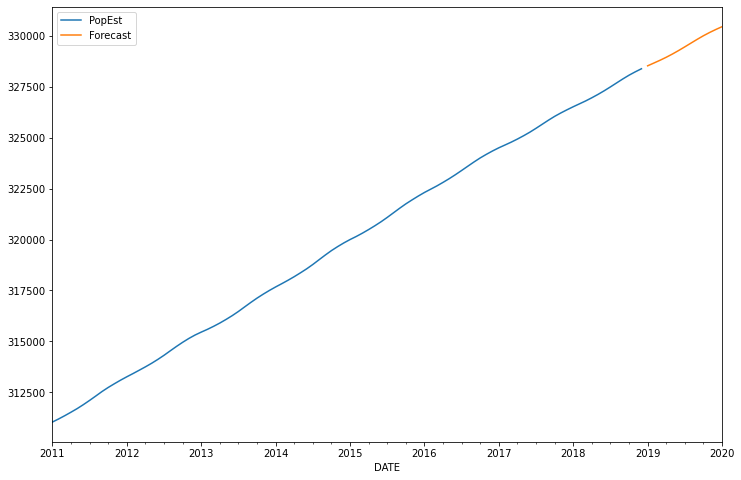

In [76]:
df['PopEst'].plot(figsize = (12,8), legend= True)
forcasted_values.plot(legend = True)

# Descriptive Statisics and Tests

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df1.index.freq = 'MS'

df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates = True)
df2.index.freq = 'D'

<AxesSubplot:xlabel='Month'>

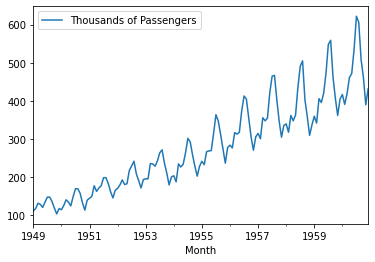

In [2]:
df1.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [6]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [7]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic','p-value','# Lags Used', '# Observations'])

In [9]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [10]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag = 'AIC')
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# obervations']
    out = pd.Series(result[0:4], index = labels)
    
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [17]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# obervations           130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<AxesSubplot:xlabel='Month'>

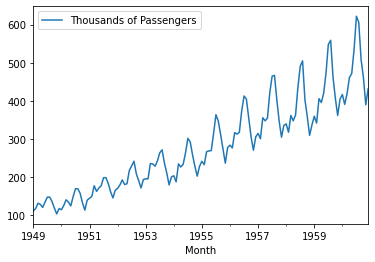

In [19]:
df1.plot()

<AxesSubplot:xlabel='Date'>

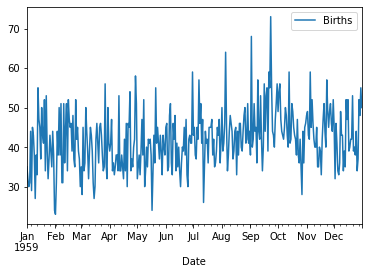

In [20]:
df2.plot()

In [21]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# obervations           358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [24]:
df3 = pd.read_csv('Data/samples.csv', index_col = 0, parse_dates=True)
df3.index.freq = 'MS'

<AxesSubplot:>

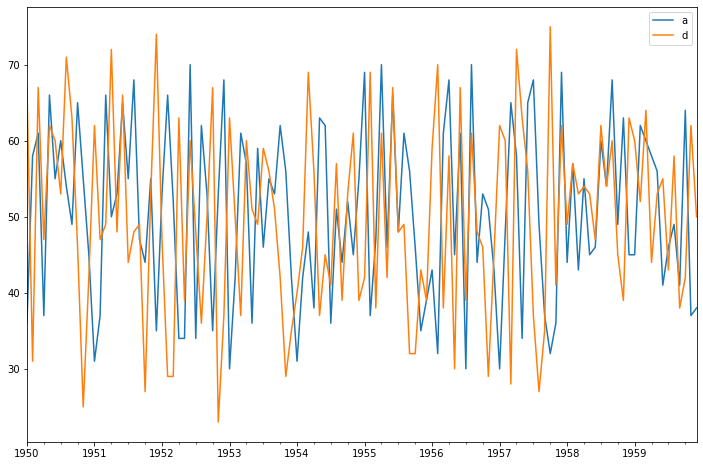

In [28]:
df3[['a','d']].plot(figsize = (12,8))

<AxesSubplot:>

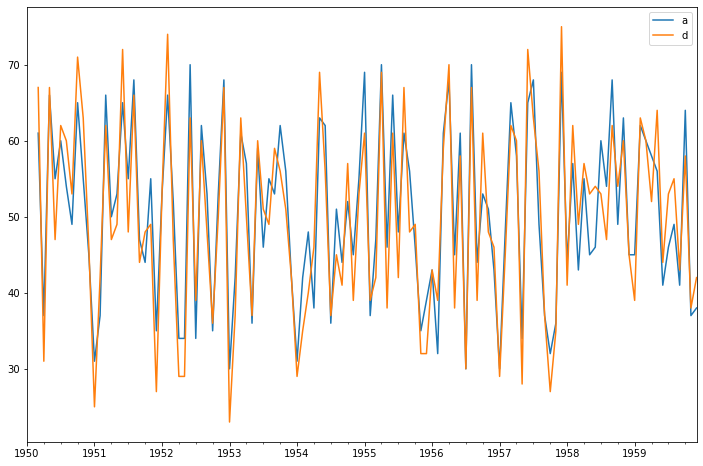

In [30]:
df3['a'].iloc[2:].plot(figsize = (12,8), legend = True)
df3['d'].shift(2).plot(legend = True)

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
grangercausalitytests(df3[['a','d']], maxlag = 3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [39]:
grangercausalitytests(df3[['b','d']], maxlag = 3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [40]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30,(50,2)), columns = ['test','predictions'])

In [42]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<AxesSubplot:>

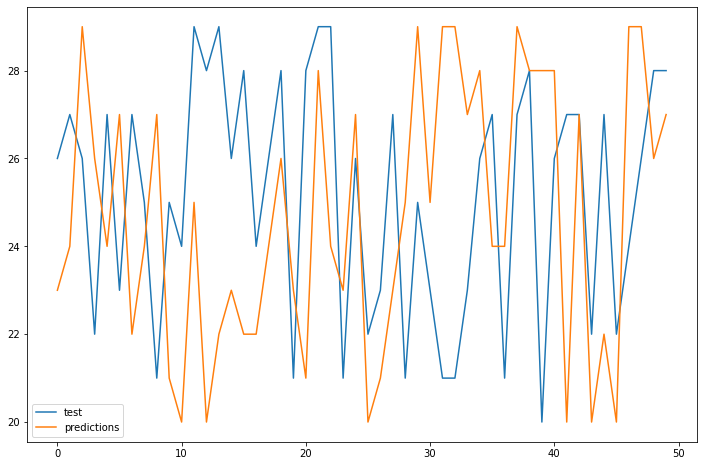

In [43]:
df.plot(figsize = (12,8))

In [44]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [49]:
print(mse(df['test'], df['predictions']))
print(rmse(df['test'], df['predictions']))
print(meanabs(df['test'], df['predictions']))

17.02
4.125530268947253
3.54


In [50]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

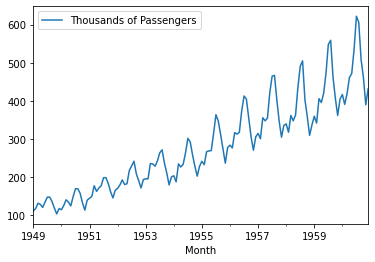

In [52]:
df.plot()

In [53]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

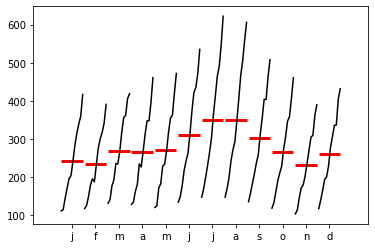

In [54]:
month_plot(df['Thousands of Passengers']);

In [55]:
dfq = df['Thousands of Passengers'].resample(rule = 'Q').mean()

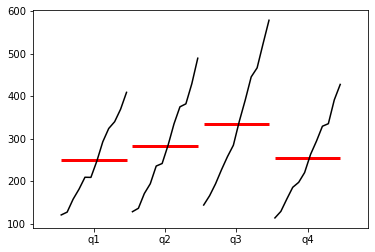

In [57]:
quarter_plot(dfq);